## 용어정리
* MDD: 최대 손실 낙폭

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 5.5 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.5 MB/s eta 0:00:00


In [57]:
!pip install scipy

In [51]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()
import pandas as pd

In [4]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,45362.562500,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,45974.386719,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,44488.535156,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,45100.355469,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,44838.140625,10314997


In [6]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,93.320000,95.370003,92.919998,95.160004,90.034531,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,91.037468,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,90.649529,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,91.718681,27327400
2018-05-10,97.459999,97.949997,97.050003,97.910004,92.636429,22388100


In [7]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-11-28,246.080002,246.649994,240.800003,241.759995,241.759995
2022-11-29,241.399994,242.789993,238.210007,240.330002,240.330002
2022-11-30,240.570007,255.330002,239.860001,255.139999,255.139999
2022-12-01,253.869995,256.119995,250.919998,254.690002,254.690002
2022-12-02,249.820007,256.059998,249.690002,255.020004,255.020004


In [8]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05'],
              dtype='datetime64[ns]', name='Date', length=1128, freq=None)

In [9]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

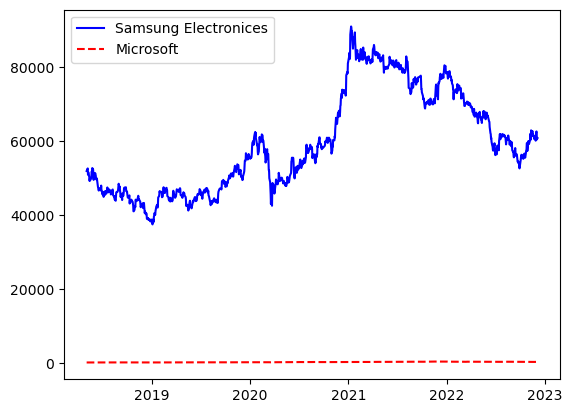

In [10]:
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronices')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

In [11]:
type(sec['Close'])

pandas.core.series.Series

In [12]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2022-11-29    60600.0
2022-11-30    62200.0
2022-12-01    62600.0
2022-12-02    60400.0
2022-12-05    60800.0
Name: Close, Length: 1128, dtype: float64

In [13]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2022-11-29    60100.0
2022-11-30    60600.0
2022-12-01    62200.0
2022-12-02    62600.0
2022-12-05    60400.0
Name: Close, Length: 1128, dtype: float64

## 일간 및 누적 변동률

In [14]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) -1)*100

In [15]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

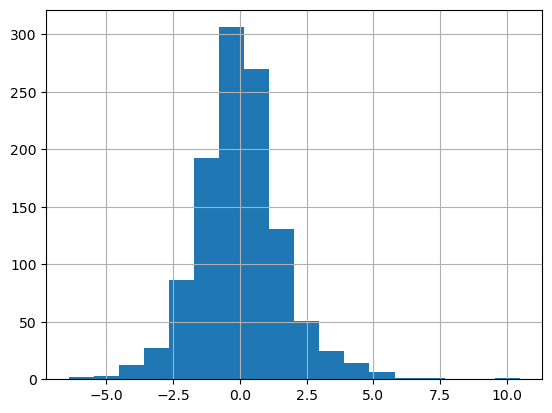

In [16]:
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [17]:
sec_dpc.describe()

count    1128.000000
mean        0.027124
std         1.622605
min        -6.387665
25%        -0.976622
50%         0.000000
75%         0.855006
max        10.470588
Name: Close, dtype: float64

In [19]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2022-11-29    30.164281
2022-11-30    32.804545
2022-12-01    33.447632
2022-12-02    29.933255
2022-12-05    30.595507
Name: Close, Length: 1128, dtype: float64

In [20]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,93.320000,95.370003,92.919998,95.160004,90.034531,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,91.037468,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,90.649529,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,91.718681,27327400
2018-05-10,97.459999,97.949997,97.050003,97.910004,92.636429,22388100
...,...,...,...,...,...,...
2022-11-28,246.080002,246.649994,240.800003,241.759995,241.759995,24778200
2022-11-29,241.399994,242.789993,238.210007,240.330002,240.330002,17956300
2022-11-30,240.570007,255.330002,239.860001,255.139999,255.139999,47553800


In [21]:
msft_dpc = (msft['Close']/msft['Close'].shift(1) -1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

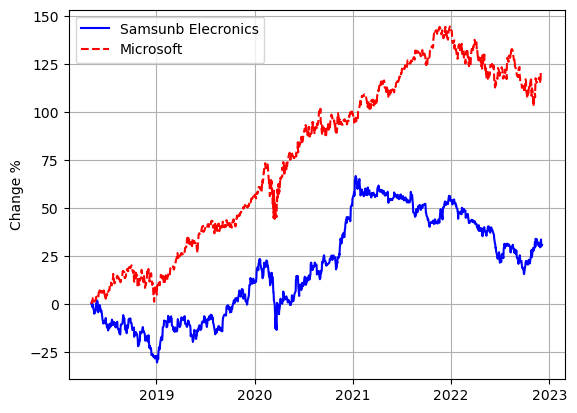

In [22]:
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsunb Elecronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# MDD (최대 손실 낙폭)

In [23]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

[*********************100%***********************]  1 of 1 completed


In [24]:
kospi.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-29,2405.540039,2433.870117,2401.100098,2433.389893,2433.389893,550000
2022-11-30,2424.439941,2472.530029,2421.419922,2472.530029,2472.530029,593900
2022-12-01,2501.429932,2501.429932,2474.330078,2479.840088,2479.840088,491200
2022-12-02,2471.500000,2471.500000,2434.330078,2434.330078,2434.330078,468500
2022-12-05,2442.169922,2442.219971,2423.310059,2436.790039,2436.790039,126585


In [28]:
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drowdown = kospi['Adj Close']/peak -1.0
max_dd = drowdown.rolling(window, min_periods=1).min()

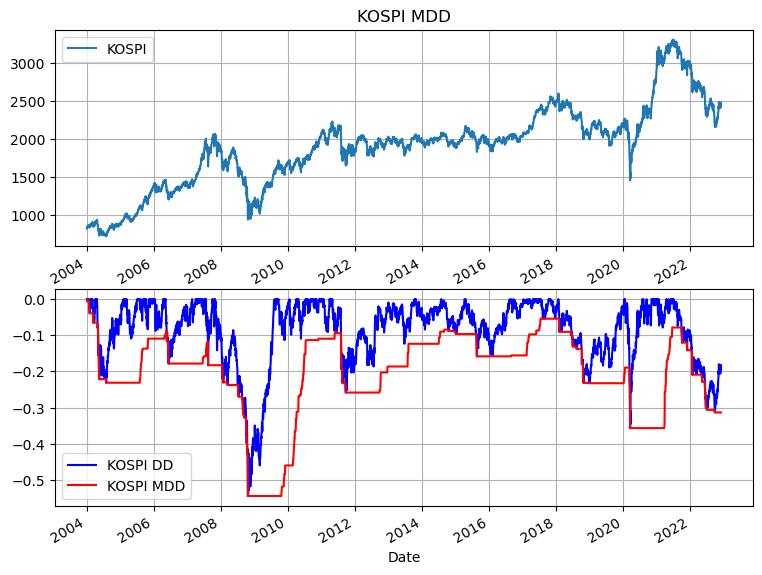

In [30]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drowdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [31]:
max_dd.min()

-0.5453665130144085

In [33]:
max_dd[max_dd==-0.54536651301440850]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

# KOSPI vs DOW 비교

In [34]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


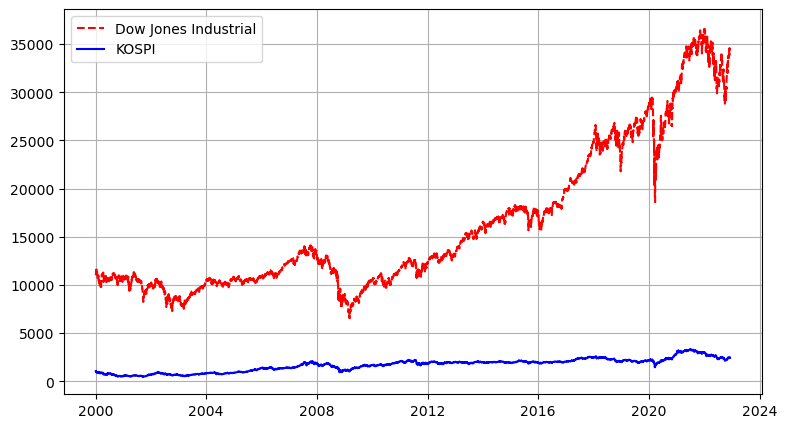

In [38]:
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [39]:
d = (dow.Close / dow.Close.loc['2000-01-04'])
k = (kospi.Close / kospi.Close.loc['2000-01-04'])

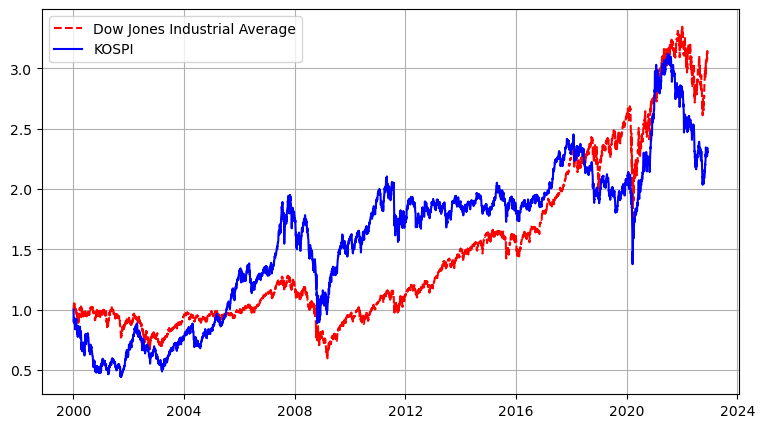

In [41]:
plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# 산점도 분석

In [46]:
len(dow)

5767

In [47]:
len(kospi)

5654

ValueError: x and y must be the same size

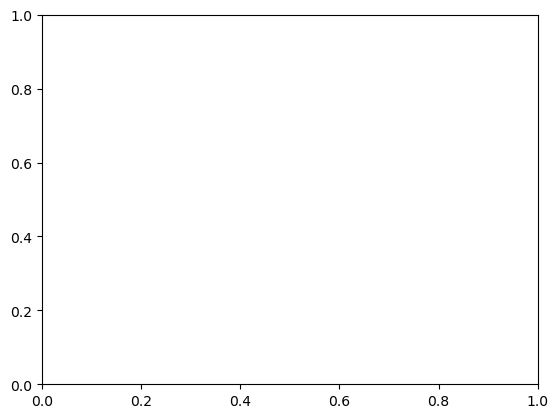

In [49]:
plt.scatter(dow, kospi, marker='.')  # error

In [52]:
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2022-11-29,33852.531250,2433.389893
2022-11-30,34589.769531,2472.530029
2022-12-01,34395.011719,2479.840088


In [54]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2022-11-29,33852.531250,2433.389893
2022-11-30,34589.769531,2472.530029
2022-12-01,34395.011719,2479.840088


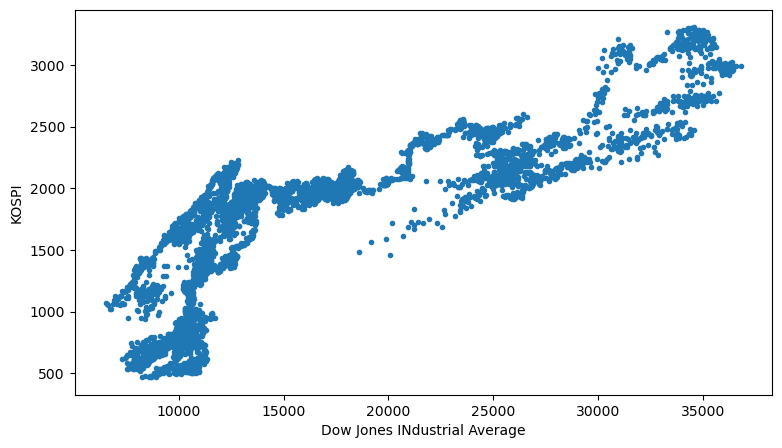

In [56]:
plt.figure(figsize=(9,5))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones INdustrial Average')
plt.ylabel('KOSPI')
plt.show()

In [58]:
from scipy import stats

In [59]:
regr = stats.linregress(df['DOW'], df['KOSPI'])

In [60]:
regr

LinregressResult(slope=0.07212564312391627, intercept=518.3629869518736, rvalue=0.8237384927205238, pvalue=0.0, stderr=0.000644012113579164, intercept_stderr=11.556322851491066)

In [72]:
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

In [61]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.823738
KOSPI,0.823738,1.000000


In [65]:
type(df['KOSPI'])

pandas.core.series.Series

In [64]:
type(df['DOW'])

pandas.core.series.Series

In [67]:
df.DOW.corr(df.KOSPI)

0.8237384927205235

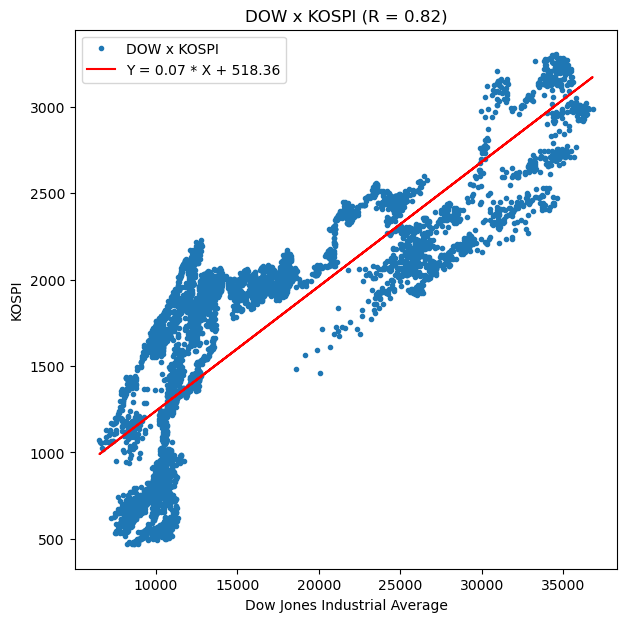

In [73]:
plt.figure(figsize=(7,7))
plt.plot(df.DOW, df.KOSPI, '.')
plt.plot(df.DOW, regr.slope*df.DOW + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()